<a href="https://colab.research.google.com/github/mkorob/NovelAnalysis/blob/main/GoneWithTheWind_Lemmatized.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gone With The Wind Character Analysis

Summary of what this notebook does to insert later.


## 0. Preliminaries

In [1]:
import requests
import pandas as pd
import nltk
from nltk import pos_tag, ne_chunk
from nltk.tokenize import word_tokenize
import re
from bs4 import BeautifulSoup

In [2]:
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('punkt')
nltk.download('words')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

## 1. Load Gone With The Wind Text from Gutenberg


In [3]:
# URL of "Gone with the Wind" on Project Gutenberg
url = "https://gutenberg.net.au/ebooks02/0200161.txt"

# Send a GET request to the URL
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Extract the content of the book
    content = response.text

    # Remove Project Gutenberg's header and footer
    start_index = content.find("CHAPTER I")
    end_index = content.find("THE END")
    content = content[start_index:end_index]

    # Display the first 500 characters of the content
    print(content[:500])
else:
    print("Failed to retrieve the book from Project Gutenberg.")

CHAPTER I


Scarlett O'Hara was not beautiful, but men seldom realized it when
caught by her charm as the Tarleton twins were.  In her face were
too sharply blended the delicate features of her mother, a Coast
aristocrat of French descent, and the heavy ones of her florid
Irish father.  But it was an arresting face, pointed of chin,
square of jaw.  Her eyes were pale green without a touch of hazel,
starred with bristly black lashes and slightly tilted at the ends.
Above them, her thick black bro


In [4]:
#check the start and the end of the novel
print(f"The Start of the GTTW : {content[:100]}")
print(f"The End of the GTTW : {content[-100:]}")

The Start of the GTTW : CHAPTER I


Scarlett O'Hara was not beautiful, but men seldom realized it when
caught by her charm a
The End of the GTTW : it then.
Tomorrow, I'll think of some way to get him back.  After all,
tomorrow is another day."






## 2. Extract Main Characters

To analyze interactions, we need to map the named entities in the text to the names of the main characters. Here, we make a list of all characters in the novel the way they are referred to in a novel and map them to a unique list of characters in the novel. (e.g. "Catherine", "Cathy", -> "Catherine").

In [ ]:
import spacy

In [ ]:
def extract_characters(text):
    nlp = spacy.load("en_core_web_sm")
    doc = nlp(text)
    named_entities = set()
    for ent in doc.ents:
        if ent.label_ in ["PERSON"]:
            named_entities.add(ent.text)

    return sorted(named_entities)

In [ ]:
len(content)

2340566

In [ ]:
#Spacy NER's extractor needs shorter texts so we split in thirds
thir_content = int(len(content)/3)
characters1 = extract_characters(content[:thir_content])
characters2 = extract_characters(content[thir_content:(thir_content*2)])
characters3 = extract_characters(content[(thir_content*2):])

In [ ]:
characters = set(characters1) | set(characters2) | set(characters3)

In [ ]:
characters = [c for c in list(characters) if c[0].isupper()]

In [ ]:
len(characters)

777

In [ ]:
characters = sorted(characters)

In [ ]:
#remove any characters that are subsets of one another (e.g. no need for Charles and Charles Hamilton)
unique_characters = set()
for name in characters:
    if not any(f"{n.strip()} " in name.strip() or f"{n.strip()}\n" in name.strip() for n in unique_characters):
        unique_characters.add(name)

In [ ]:
len(unique_characters)

534

In [ ]:
#export the dataframe to CSV and manually match characters
pd.DataFrame(characters).to_csv("possible_characters.csv")

In [ ]:
#export the dataframe to CSV and manually match characters
pd.DataFrame(unique_characters).to_csv("possible_reduced_characters_v2.csv")

In [5]:
#import the completed list
characters = pd.read_excel("/content/possible_reduced_characters_v2 (1).xlsx")

In [6]:
#this is old output, the new one should have two columns, one for name as in book, the second for the "real name"
characters = characters[['character', 'character_real']].loc[characters['character_real'] != "remove", :].reset_index(drop = True)

In [7]:
characters

character character_real
0           Rosa           Rosa
1        Watling        Watling
2    Kill Ashley         Ashley
3          Darcy          Darcy
4         Ulster         Ulster
..           ...            ...
221  Sadie Belle          Belle
222       Wynder         Wynder
223         Rene           Rene
224        India          India
225         Pork           Pork

[226 rows x 2 columns]

In [8]:
characters['character_real'].unique()

array(['Rosa', 'Watling', 'Ashley', 'Darcy', 'Ulster', 'Scarlett',
       'Bonnie', 'Jeff\nDavis', 'Mammy', 'Merriwether', 'Jack', 'Munroe',
       'Fontaine', 'Pauline', 'Dan Tucker', 'Buck Munroe', 'Rhett',
       'Mick', 'Pharisees', 'Poke', 'Pitty', 'Sam', 'Suellen', 'Bullock',
       'Prissy', 'Susan Elinor', 'Sarah Jane', 'Phillip', 'Melanie',
       'Nathan Bedford Forrest', 'Frank', 'Robillard', 'Will', 'Bub',
       'McRae', 'Johnson', 'Tarleton', 'Henry', 'Burdens', 'Paul Wilson',
       'Doc Fontaine', 'Charles', 'Andy Bonnell', 'Betsy', 'Carreen',
       'Brown', 'Morgan', 'Wade', 'Calverts', 'Emmie', 'Jonas', 'Betty',
       'Archie', 'Cathleen', 'Jane', 'Jerry', 'Dilcey', 'Brenton',
       'Hilton', 'Tom', 'Alex', 'Jim', 'Sylvia', 'Beau', 'Hetty Tarleton',
       'Suzannah Talbot', 'Elsing', 'Lou', 'Boyne', 'Calhoun',
       'Dolly Merriwether', 'Meade', 'John', 'Stuart', 'Caroline Irene',
       'Jeb Stuart', 'Gerald', 'Hugh', 'Melissy', 'Bonnell', 'Wilkerson',
       'T

## 3. Split Text into Narrative and Dialogue

In [9]:
def split_text(text):

    sections = []

    inside_quote = False
    start_index = 0
    end_index = 0
    current_quote_type = "Narrative"
    count_quotations =0

    for i, char in enumerate(text):
        if char == '"' and count_quotations == 0:
            if not inside_quote and text[i+1].isupper():
                #append existing text
                sections.append({ 'text': text[start_index:i].strip(), 'type': "Narrative"})
                #start end
                inside_quote = True
                start_index = i
                current_quote_type = 'Dialogue'
                count_quotations = 1
        elif char == '"' and count_quotations == 1:
            if inside_quote:
                inside_quote = False
                end_index = i
                #append existing text
                sections.append({ 'text': text[start_index:end_index+1].strip(), 'type': "Dialogue"})
                start_index = i +1
                count_quotations = 0
    return sections

In [10]:
#split text into sections
def split_text_into_sections(text):
    sections = []

    for line in text.split('\r\n\r\n'):
        line = line.strip()
        if line:
          if '"' in line:
            sections = sections + split_text(line)
          else:
            sections.append({'text': line, 'type': 'Narrative'})

    df = pd.DataFrame(sections)
    return df

In [11]:
result_df = split_text_into_sections(content)
#filter out empty sections (paragraphs spaces)
result_df = result_df.loc[result_df['text'] != "", ]

In [12]:
result_df

text       type
0      CHAPTER I\n\n\nScarlett O'Hara was not beautif...  Narrative
1      "I know you two don't care about being expelle...   Dialogue
2                                              she said.  Narrative
3      "But what about Boyd?  He's kind of set on get...   Dialogue
5      "Oh, he can read law in Judge Parmalee's offic...   Dialogue
...                                                  ...        ...
13005                         "I won't think of it now,"   Dialogue
13006  she said again, aloud, trying to push\nher mis...  Narrative
13007       "I'll--why, I'll go home to Tara\ntomorrow,"   Dialogue
13008  and her spirits lifted faintly.\n\nShe had gon...  Narrative
13009  "I'll think of it all tomorrow, at Tara.  I ca...   Dialogue

[10450 rows x 2 columns]

In [13]:
#export df to check for any issues
result_df.to_csv("content_df.csv")

In [14]:
result_df.head(n = 50)

text       type
0   CHAPTER I\n\n\nScarlett O'Hara was not beautif...  Narrative
1   "I know you two don't care about being expelle...   Dialogue
2                                           she said.  Narrative
3   "But what about Boyd?  He's kind of set on get...   Dialogue
5   "Oh, he can read law in Judge Parmalee's offic...   Dialogue
6                          answered Brent carelessly.  Narrative
7   "Besides, it don't\nmatter much.  We'd have ha...   Dialogue
9                                              "Why?"   Dialogue
11  "The war, goose!  The war's going to start any...   Dialogue
13        "You know there isn't going to be any war,"   Dialogue
14                              said Scarlett, bored.  Narrative
15  "It's all just talk.  Why, Ashley Wilkes and h...   Dialogue
17                         "Not going to be any war!"   Dialogue
18  cried the twins indignantly, as though\nthey h...  Narrative
19  "Why, honey, of course there's going to be a w...   Dialogue
20                                       said Stuart.  Narrative
21  "The Yankees may be scared of us, but after th...   Dialogue
22         Scarlett made a mouth of bored impatience.  Narrative
23  "If you say 'war' just once more, I'll go in t...   Dialogue
24  She meant what she said, for she could never l...  Narrative
25  "What did your mother say about you two being ...   Dialogue
26  The boys looked uncomfortable, recalling their...  Narrative
27                                            "Well,"   Dialogue
28  said Stuart, "she hasn't had a chance to say a...  Narrative
29  "Didn't she say anything when you got home las...   Dialogue
31  "We were in luck last night.  Just before we g...   Dialogue
33                  "Do you suppose she'll hit Boyd?"   Dialogue
34  Scarlett, like the rest of the\nCounty, could ...  Narrative
35  "Of course she won't hit Boyd.  She never did ...   Dialogue
36            said Stuart, proud of his six feet two.  Narrative
37  "That's why we left him\nat home to explain th...   Dialogue
39  "Will your mother ride the new horse to the Wi...   Dialogue
41  "She wants to, but Pa says he's too dangerous....   Dialogue
43                 "I hope it doesn't rain tomorrow,"   Dialogue
44                                     said Scarlett.  Narrative
45  "It's rained\nnearly every day for a week.  Th...   Dialogue
47     "Oh, it'll be clear tomorrow and hot as June,"   Dialogue
48                                       said Stuart.  Narrative
49  "Look at that sunset.  I never saw one redder....   Dialogue
50  They looked out across the endless acres of Ge...  Narrative
51  "Be careful!  Be careful!  We had you once.  W...   Dialogue
52  To the ears of the three on the porch came the...  Narrative
53                                           "Yas'm,"   Dialogue
54  and there were sounds of footsteps going\nout ...  Narrative
55                 "Look, Scarlett.  About tomorrow,"   Dialogue
56                                        said Brent.  Narrative
57  "Just because\nwe've been away and didn't know...   Dialogue
59  "Well, I have!  How did I know you all would b...   Dialogue
61                                "You a wallflower!"   Dialogue
62                     The boys laughed uproariously.  Narrative

##4. Match Entities between Dialogue Sections

In [15]:
def match_entities(text, text_type, characters):
    if text_type == "Narrative":
        ent_out = []
        for index, row in characters.iterrows():
            entity = row['character']
            matches = re.finditer(re.escape(entity), text)
            for match in matches:
                ent_out.append((match.start(), match.end(), row['character_real']))
        ent_out.sort(key=lambda x: x[0])
        #return all characters unless they were just mentioned before
        return [ent_out[i][2] for i in range(len(ent_out)) if i == 0 or ent_out[i][2] != ent_out[i - 1][2]]

    else:
        return None


result_df['Entities'] = result_df.apply(lambda row: match_entities(row['text'], row['type'], characters), axis=1)

In [16]:
result_df.head(n=50)

text       type  \
0   CHAPTER I\n\n\nScarlett O'Hara was not beautif...  Narrative   
1   "I know you two don't care about being expelle...   Dialogue   
2                                           she said.  Narrative   
3   "But what about Boyd?  He's kind of set on get...   Dialogue   
5   "Oh, he can read law in Judge Parmalee's offic...   Dialogue   
6                          answered Brent carelessly.  Narrative   
7   "Besides, it don't\nmatter much.  We'd have ha...   Dialogue   
9                                              "Why?"   Dialogue   
11  "The war, goose!  The war's going to start any...   Dialogue   
13        "You know there isn't going to be any war,"   Dialogue   
14                              said Scarlett, bored.  Narrative   
15  "It's all just talk.  Why, Ashley Wilkes and h...   Dialogue   
17                         "Not going to be any war!"   Dialogue   
18  cried the twins indignantly, as though\nthey h...  Narrative   
19  "Why, honey, of course there's going to be a w...   Dialogue   
20                                       said Stuart.  Narrative   
21  "The Yankees may be scared of us, but after th...   Dialogue   
22         Scarlett made a mouth of bored impatience.  Narrative   
23  "If you say 'war' just once more, I'll go in t...   Dialogue   
24  She meant what she said, for she could never l...  Narrative   
25  "What did your mother say about you two being ...   Dialogue   
26  The boys looked uncomfortable, recalling their...  Narrative   
27                                            "Well,"   Dialogue   
28  said Stuart, "she hasn't had a chance to say a...  Narrative   
29  "Didn't she say anything when you got home las...   Dialogue   
31  "We were in luck last night.  Just before we g...   Dialogue   
33                  "Do you suppose she'll hit Boyd?"   Dialogue   
34  Scarlett, like the rest of the\nCounty, could ...  Narrative   
35  "Of course she won't hit Boyd.  She never did ...   Dialogue   
36            said Stuart, proud of his six feet two.  Narrative   
37  "That's why we left him\nat home to explain th...   Dialogue   
39  "Will your mother ride the new horse to the Wi...   Dialogue   
41  "She wants to, but Pa says he's too dangerous....   Dialogue   
43                 "I hope it doesn't rain tomorrow,"   Dialogue   
44                                     said Scarlett.  Narrative   
45  "It's rained\nnearly every day for a week.  Th...   Dialogue   
47     "Oh, it'll be clear tomorrow and hot as June,"   Dialogue   
48                                       said Stuart.  Narrative   
49  "Look at that sunset.  I never saw one redder....   Dialogue   
50  They looked out across the endless acres of Ge...  Narrative   
51  "Be careful!  Be careful!  We had you once.  W...   Dialogue   
52  To the ears of the three on the porch came the...  Narrative   
53                                           "Yas'm,"   Dialogue   
54  and there were sounds of footsteps going\nout ...  Narrative   
55                 "Look, Scarlett.  About tomorrow,"   Dialogue   
56                                        said Brent.  Narrative   
57  "Just because\nwe've been away and didn't know...   Dialogue   
59  "Well, I have!  How did I know you all would b...   Dialogue   
61                                "You a wallflower!"   Dialogue   
62                     The boys laughed uproariously.  Narrative   

                                             Entities  
0   [Scarlett, Tarleton, Stuart, Brent, Tarleton, ...  
1                                                None  
2                                                  []  
3                                                None  
5                                                None  
6                                             [Brent]  
7                                                None  
9                                                None  
11                                               None  
13                  

In [17]:
convo_df =  pd.DataFrame(data = {
        'Character1': [],
        'Character2': [],
        'StartIndex': [],
        'EndIndex': [],
        'text_out': []
    })

convo_characters = []
convo_start = None
convo_end = None
text_out = ""
for idx, row in result_df.iterrows():
  if row['type'] == "Dialogue":
    convo_end = idx
    text_out += row['text']
    if convo_start is None:
      convo_start = idx

  else:
    if row['type'] == "Narrative":
      for entity in row['Entities']:
        if entity not in convo_characters and convo_characters is not None:
            convo_characters.append(entity)
        if len(convo_characters) > 2:
            new_row = pd.DataFrame(data= {'Character1': convo_characters[0], 'Character2': convo_characters[1], 'StartIndex': convo_start, 'EndIndex': convo_end, 'text_out': text_out}, index=[0])
            convo_df = pd.concat([convo_df, new_row])
            convo_characters = [convo_characters[-1]]
            convo_start = None
            text_out = ""

In [18]:
convo_df = convo_df.dropna()

In [19]:
def merge_characters(char1, char2):
  list_out = "_".join(sorted([char1, char2]))
  return str(list_out)

In [20]:
convo_df['characters'] = convo_df.apply(lambda row: merge_characters(row['Character1'], row['Character2']), axis=1)

In [21]:
convo_df['character_count'] = convo_df['text_out'].apply(len)

In [22]:
convo_df

Character1 Character2 StartIndex EndIndex  \
0    Scarlett      Brent          1       19   
0      Stuart   Scarlett         21       27   
0         Tom   Fontaine         29       33   
0    Beatrice   Tarleton         35       35   
0      Stuart   Scarlett         37       49   
..        ...        ...        ...      ...   
0      Ashley   Scarlett      12887    12897   
0       Rhett      Belle      12899    12911   
0      Ashley      Rhett      12913    12947   
0      Gerald      Rhett      12949    12971   
0      Ashley      Rhett      12973    13007   

                                             text_out         characters  \
0   "I know you two don't care about being expelle...     Brent_Scarlett   
0   "The Yankees may be scared of us, but after th...    Scarlett_Stuart   
0   "Didn't she say anything when you got home las...       Fontaine_Tom   
0   "Of course she won't hit Boyd.  She never did ...  Beatrice_Tarleton   
0   "That's why we left him\nat home to explain th...    Scarlett_Stuart   
..                                                ...                ...   
0   "But love can't wear out!""Yours for Ashley di...    Ashley_Scarlett   
0   "It was so obvious that we were meant for each...        Belle_Rhett   
0   "But then, there was Bonnie and I saw that eve...       Ashley_Rhett   
0   "Don't be a fool, Rhett!  I can make--""Don't ...       Gerald_Rhett   
0   "A glamor to it--a perfection, a symmetry like...       Ashley_Rhett   

    character_count  
0              1015  
0               971  
0              1302  
0               126  
0               714  
..              ...  
0              1702  
0              2113  
0              2358  
0              1676  
0              1796  

[1436 rows x 7 columns]

<Axes: xlabel='characters'>

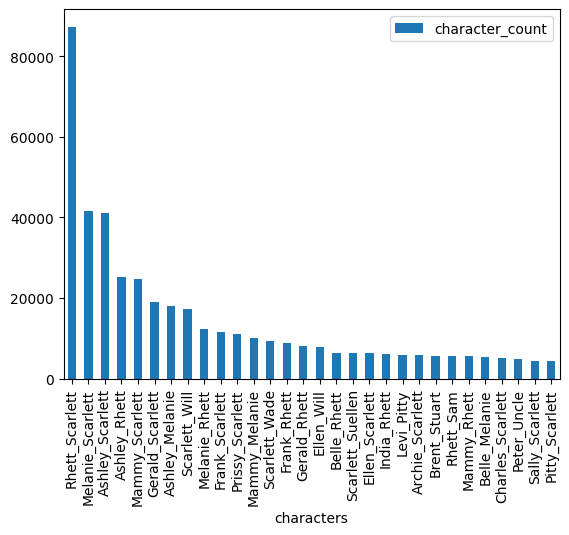

In [23]:
convo_df.groupby(['characters']).agg({'character_count': 'sum'}).sort_values(by='character_count', ascending=False).head(n=30).plot(kind = "bar")

In [24]:
main_interactions  = ["Rhett_Scarlett", "Ashley_Scarlett", "Melanie_Scarlett", "Gerald_Scarlett"]

In [25]:
main_characters = ["Scarlett", "Rhett", "Ashley", "Gerald", "Melanie"]

In [26]:
convo_df_main = convo_df.loc[convo_df['characters'].isin(main_interactions), :].reset_index(drop = True)

<Axes: xlabel='characters'>

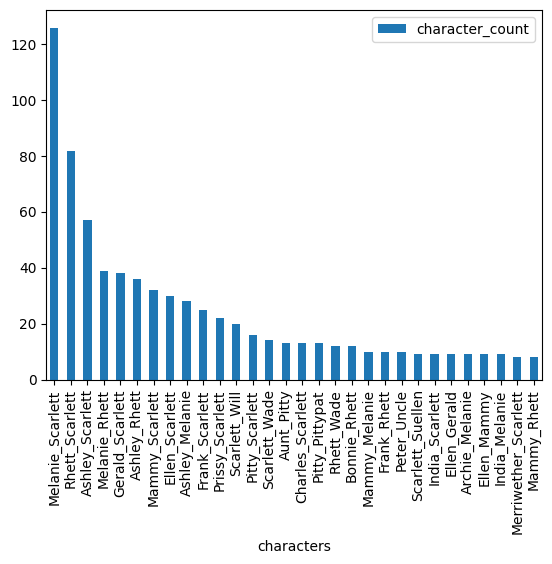

In [27]:
convo_df.groupby(['characters']).agg({'character_count': 'count'}).sort_values(by='character_count', ascending=False).head(n=30).plot(kind = "bar")

## 5. Pre-process Text for Regressions and LDA


### 5.1 Clean text from stopwords and other irrelevant words

In [28]:
import pandas as pd

# Load the Excel file into a pandas DataFrame
df = pd.read_excel('possible_reduced_characters_v2 (1).xlsx', header=None)

# Filter the DataFrame to exclude rows where the third column contains "remove"
filtered_df = df[df.iloc[:, 2] != 'remove']

# Extract unique character names from the first column
character_names_all = filtered_df.iloc[:, 1].unique()

row_to_remove = 0
if row_to_remove < len(character_names_all):
    character_names_all = list(character_names_all)
    character_names_all.pop(row_to_remove)

# Print the extracted character names
print(character_names_all)

['Rosa', 'Watling', 'Kill Ashley', 'Darcy', 'Ulster', 'Scarlert', 'Eugenie Victoria', 'Jeff\nDavis', 'Tell Mammy', 'Merriwether', 'Jack', 'Munroe', 'Scarlett', 'Mama Fontaine', 'Pauline', 'Dan Tucker', 'Unless Ashley', 'Buck Munroe', 'Fortunately Scarlett', 'Butler', 'Mick', 'Katie\nScarlett', 'Pharisees', 'Poke', 'Pitty', 'Big Sam', 'Sue', 'Bullock', 'Damn Prissy', 'Susan Elinor', 'Sarah Jane', 'Sam', 'Phil', 'Melly', 'Nathan Bedford Forrest', 'Sometimes Frank', 'Pierre Robillard', 'All Scarlett', 'Benteen', 'Bub', 'Mellie', 'Melanie', 'McRae', 'Johnson', 'Tarleton', 'Henry', 'Burdens', 'Paul Wilson', 'Generally Scarlett', 'Doc Fontaine', 'Dalton', 'Andy Bonnell', 'Suellen', 'Mammy, Cookie', 'Betsy', 'Small Carreen', 'Brown', 'Morgan', 'Wade', 'Calverts', 'Philip', 'Emmie', 'Kennedy', 'Jonas', 'Slattery', 'Betty', 'Bulloch', 'Off Scarlett', 'Calvert', 'Jane', 'Jerry', 'Dilcey', 'Mel--', 'Brenton', 'Yankee Hilton', 'Cathleen', 'Mees Scarlett', 'Tom', 'Mammy--Mammy', 'Wheeler', 'Alex.',

In [29]:
tokenizer_reg = nltk.RegexpTokenizer(r"\w+")

In [31]:
import spacy

In [32]:
nlp = spacy.load("en_core_web_sm")

In [361]:
import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
tokenizer_reg = nltk.RegexpTokenizer(r"\w+")

# Download stopwords if not already downloaded
nltk.download('stopwords')

# Manually add additional stopwords
additional_stopwords = [name.lower() for name in character_names_all]
custom_list_of_extra_stopwords = ["n't", "'s", "'m", "'ve", "'em", "'ll", "'t", "'d", "us", "'re", "there's", "there're", "they'd", "they've", "'twill", "s", "oh", "ca", "wo"]
# Combine NLTK stopwords with additional stopwords
all_stopwords = set(stopwords.words('english') + custom_list_of_extra_stopwords)

#lemmatize words
def lemmatize_tokens(text):
    doc = nlp(text)
    lemmatized_tokens = [token.lemma_ for token in doc]
    return lemmatized_tokens

# Define a function to remove stopwords from text
def remove_stopwords(text):

    # 1. Tokenize the text to remove stopwords
    text_tokens = word_tokenize(text)
    tokens_without_sw = [word for word in text_tokens if not word.lower() in all_stopwords]
    # Join tokens back into a string
    text = ' '.join(tokens_without_sw)

    #2. Remove punctuation
    tokens_without_punct = tokenizer_reg.tokenize(text.lower())

    text = ' '.join(tokens_without_punct)

    #punctuation_pattern = re.compile(r'[^\w\s]')
    # Remove punctuation marks from the text
    #text = punctuation_pattern.sub(' ', text.lower())

    #3. Remove names
    for substring in additional_stopwords:
        text = text.replace(substring, '')

    #4. Lemmatize text
    lemma_text = " ".join(lemmatize_tokens(text))

    return lemma_text


# Assuming convo_df_main is your DataFrame and 'text_out' is the column containing text
# Apply the remove_stopwords function to the 'text_out' column
convo_df_main['text_out_processed'] = convo_df_main['text_out'].apply(remove_stopwords)

# Print the DataFrame to see the result
convo_df_main['text_out_processed'].head(60)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0                             careful careful take back
1       something important tell hardly know say nea...
2                    none county touch state well missy
3     reason buy   ask buy well use buy   go mope ch...
4     twelve oak usual cade   settle   set gallery s...
5     well speak ask kindly sister say hope nothing ...
6     sorry daughter nothing child lot x mother fift...
7     wish quit push want tara old plantation planta...
8     young come love land get away irish child both...
9                      brat baptize yes dead poor thing
10    ley idea love could know always act y ladylike...
11    get another overseer would cheat eyetooth must...
12    put tray come lace tighter try eat little afte...
13      remember tiful day till die perhaps wedding day
14    mrs   take toss every hunt break collar bone l...
15    drive   wear get horse yet course right right ...
16                  looks know look like without shimmy
17    live barbecue till afternoon course attent

In [362]:
convo_df_main.head()

Character1 Character2 StartIndex EndIndex  \
0     Gerald   Scarlett         51       51   
1    Melanie   Scarlett        327      329   
2     Gerald   Scarlett        335      337   
3   Scarlett     Gerald        359      361   
4   Scarlett     Gerald        363      373   

                                            text_out        characters  \
0  "Be careful!  Be careful!  We had you once.  W...   Gerald_Scarlett   
1  "Scarlett, I have something so important\nto t...  Melanie_Scarlett   
2  "There's none in the County can touch you, nor...   Gerald_Scarlett   
3  "And the only reason you\nbought her was becau...   Gerald_Scarlett   
4  "How are they all over at Twelve Oaks?""About ...   Gerald_Scarlett   

   character_count                                 text_out_processed  \
0               73                          careful careful take back   
1              173    something important tell hardly know say nea...   
2               75                 none county touch state well missy   
3              306  reason buy   ask buy well use buy   go mope ch...   
4              748  twelve oak usual cade   settle   set gallery s...   

   token_count                                             Chunks  
0            4                   [[careful, careful, take, back]]  
1           10  [[something, important, tell, hardly, know, sa...  
2            6        [[none, county, touch, state, well, missy]]  
3           23  [[reason, bought, asked, buy, well, use, buyin...  
4           56  [[twelve, oaks, usual, cade, settled, set, gal...

### 5.2 Pre-processing for LDA

In [363]:
def count_tokens(text):
    # Split the text by whitespace to get tokens
    tokens = text.split()
    # Return the count of tokens
    return len(tokens)

# Apply the function to each row in the 'text_out_processed' column
convo_df_main['token_count'] = convo_df_main['text_out_processed'].apply(count_tokens)

In [364]:
import pandas as pd

# Assuming convo_df_main is your existing DataFrame

# Create a new DataFrame with only the specified columns
new_df = convo_df_main[['characters', 'token_count', 'text_out_processed']].copy()

# Display the new DataFrame
print(new_df)

           characters  token_count  \
0     Gerald_Scarlett            4   
1    Melanie_Scarlett           10   
2     Gerald_Scarlett            6   
3     Gerald_Scarlett           23   
4     Gerald_Scarlett           56   
..                ...          ...   
298  Melanie_Scarlett           14   
299  Melanie_Scarlett            3   
300  Melanie_Scarlett           43   
301    Rhett_Scarlett          249   
302   Ashley_Scarlett          136   

                                    text_out_processed  
0                            careful careful take back  
1      something important tell hardly know say nea...  
2                   none county touch state well missy  
3    reason buy   ask buy well use buy   go mope ch...  
4    twelve oak usual cade   settle   set gallery s...  
..                                                 ...  
298  good night promise anything darle    kind love...  
299                                  woman friend ever  
300  want word either must cry

In [365]:
import pandas as pd

# Assuming new_df is your DataFrame containing the columns characters, token_count, and text_out_processed

# Counting rows where token_count is less than 9 or equal to 9
count = len(new_df[(new_df['token_count'] < 9) | (new_df['token_count'] == 9)])

print("Number of rows where token_count is less than 9 or equal to 9:", count)

Number of rows where token_count is less than 9 or equal to 9: 102


In [366]:
import pandas as pd

# Assuming new_df is your DataFrame containing the columns characters, token_count, and text_out_processed

# Filter rows where token_count is 9 or less
filtered_df = new_df[new_df['token_count'] <= 9]

# Count occurrences of each word in the "characters" column
word_counts = filtered_df['characters'].value_counts()

# Print the counts
print("Number of rows with 9 or less tokens for each word in 'characters' column:")
print(word_counts)

Number of rows with 9 or less tokens for each word in 'characters' column:
characters
Melanie_Scarlett    53
Ashley_Scarlett     18
Rhett_Scarlett      16
Gerald_Scarlett     15
Name: count, dtype: int64


In [367]:
# Get unique values in the "characters" column
unique_characters = new_df['characters'].unique()

# Create separate DataFrames with different variable names
for character in unique_characters:
    globals()[f'df_{character.replace(" ", "_")}'] = new_df[new_df['characters'] == character].copy()

# Now, you have separate DataFrames named df_Gerald_Scarlett, df_Melanie_Scarlett, df_Rhett_Scarlett, and df_Ashley_Scarlett

In [368]:
df_Ashley_Scarlett

characters  token_count  \
10   Ashley_Scarlett           54   
13   Ashley_Scarlett            8   
17   Ashley_Scarlett           10   
20   Ashley_Scarlett           13   
26   Ashley_Scarlett            2   
28   Ashley_Scarlett            5   
61   Ashley_Scarlett            2   
64   Ashley_Scarlett            1   
78   Ashley_Scarlett           10   
80   Ashley_Scarlett           10   
95   Ashley_Scarlett          141   
96   Ashley_Scarlett            2   
97   Ashley_Scarlett            8   
103  Ashley_Scarlett          228   
143  Ashley_Scarlett            5   
157  Ashley_Scarlett           19   
166  Ashley_Scarlett            3   
168  Ashley_Scarlett          450   
169  Ashley_Scarlett           23   
176  Ashley_Scarlett           18   
179  Ashley_Scarlett           36   
181  Ashley_Scarlett           83   
182  Ashley_Scarlett           18   
183  Ashley_Scarlett           14   
184  Ashley_Scarlett          259   
185  Ashley_Scarlett          102   
187  Ashley_Scarlett           38   
188  Ashley_Scarlett           15   
190  Ashley_Scarlett           37   
192  Ashley_Scarlett           12   
193  Ashley_Scarlett           76   
196  Ashley_Scarlett           57   
199  Ashley_Scarlett           23   
200  Ashley_Scarlett           82   
201  Ashley_Scarlett            5   
203  Ashley_Scarlett          367   
206  Ashley_Scarlett            4   
213  Ashley_Scarlett            3   
215  Ashley_Scarlett           13   
224  Ashley_Scarlett            5   
247  Ashley_Scarlett            2   
255  Ashley_Scarlett           72   
257  Ashley_Scarlett          174   
258  Ashley_Scarlett           73   
259  Ashley_Scarlett            3   
261  Ashley_Scarlett           92   
265  Ashley_Scarlett           29   
266  Ashley_Scarlett           21   
274  Ashley_Scarlett           37   
280  Ashley_Scarlett           44   
281  Ashley_Scarlett            9   
282  Ashley_Scarlett           47   
284  Ashley_Scarlett           91   
293  Ashley_Scarlett           48   
294  Ashley_Scarlett            6   
297  Ashley_Scarlett            9   
302  Ashley_Scarlett          136   

                                    text_out_processed  
10   ley idea love could know always act y ladylike...  
13     remember tiful day till die perhaps wedding day  
17   live barbecue till afternoon course attentive ...  
20   let hot headed let war misery world cause war ...  
26                                          baby house  
28                         want good time jine cavalry  
61                                           dear wife  
64                                               dixie  
78   forgive say   know love mad silly go porch som...  
80   gentleman georgia troop well can t get along w...  
95   perhaps old march ride shoot mrs   kindly lent...  
96                                             god ley  
97            news news know fer sartin lady soon tell  
103  could tonight   boy home luck giggle pull away...  
143                      like understand feel do thing  
157  mrs wilke bother husband capture first manassa...  
166                                  beloved come home  
168  skunk ever one become wonder wonder become tar...  
169  nothing leave nothing leave nothing love nothi...  
176  ah difference even though poor still feel like...  
179  love hell permit come atlanta get tax money le...  
181  thing want tell change subject baring love lac...  
182  figger way pa go   nun llen leave course could...  
183  tiful voice anyone pa glad ley rather priest r...  
184  never say helpless turtle back wilke family pu...  
185  ley must come atlanta need help badly look mil...  
187  manager offer half interest tell already make ...  
188  ley could refuse do ungrateful make appear hel...  
190  talk go new york think nothing atlanta besides...  
192  thank darling would crowd get house ley say ye...  
193  england recognize jeff   commandeer cotton get...  
196  nothing kind earthly good would le

In [369]:
import pandas as pd

# List of DataFrames
dataframes = [df_Ashley_Scarlett, df_Rhett_Scarlett, df_Gerald_Scarlett, df_Melanie_Scarlett]
for df in dataframes:
    # Drop the 'characters' column
    df.drop(columns=['characters'], inplace=True)

    # Reset the index
    df.reset_index(drop=True, inplace=True)

    # Print the DataFrame after removing the 'characters' column and resetting the index
    print(df)

    token_count                                 text_out_processed
0            54  ley idea love could know always act y ladylike...
1             8    remember tiful day till die perhaps wedding day
2            10  live barbecue till afternoon course attentive ...
3            13  let hot headed let war misery world cause war ...
4             2                                         baby house
5             5                        want good time jine cavalry
6             2                                          dear wife
7             1                                              dixie
8            10  forgive say   know love mad silly go porch som...
9            10  gentleman georgia troop well can t get along w...
10          141  perhaps old march ride shoot mrs   kindly lent...
11            2                                            god ley
12            8           news news know fer sartin lady soon tell
13          228  could tonight   boy home luck giggle pull awa

In [370]:
num_rows = df_Ashley_Scarlett.shape[0]
print("Number of rows in df_Ashley_Scarlett:", num_rows)

Number of rows in df_Ashley_Scarlett: 57


In [371]:
num_rows = df_Rhett_Scarlett.shape[0]
print("Number of rows in df_Rhett_Scarlett:", num_rows)

Number of rows in df_Rhett_Scarlett: 82


In [372]:
num_rows = df_Gerald_Scarlett.shape[0]
print("Number of rows in df_Gerald_Scarlett:", num_rows)

Number of rows in df_Gerald_Scarlett: 38


In [373]:
num_rows = df_Melanie_Scarlett.shape[0]
print("Number of rows in df_Melanie_Scarlett:", num_rows)

Number of rows in df_Melanie_Scarlett: 126


In [374]:
import pandas as pd

def combine_text(df):
    # Group the DataFrame into groups of 10 consecutive rows
    grouped = df.groupby(df.index // 10)

    # Aggregate each group into a single row by concatenating the text
    combined_df = grouped.agg({'text_out_processed': ' '.join, 'token_count': 'sum'}).reset_index(drop=True)

    return combined_df

# Assuming df_Ashley_Scarlett1, df_Ashley_Scarlett2, df_Ashley_Scarlett3, and df_Ashley_Scarlett4 are your dataframes
# Replace these with your actual dataframe names

# Apply the combine_text function to each dataframe
combined_df_Ashley = combine_text(df_Ashley_Scarlett)
combined_df_Rhett = combine_text(df_Rhett_Scarlett)
combined_df_Melanie = combine_text(df_Melanie_Scarlett)
combined_df_Gerald = combine_text(df_Gerald_Scarlett)

# Print the combined DataFrames
print(combined_df_Ashley)
print(combined_df_Rhett)
print(combined_df_Melanie)
print(combined_df_Gerald)

                                  text_out_processed  token_count
0  ley idea love could know always act y ladylike...          115
1  perhaps old march ride shoot mrs   kindly lent...          897
2  love hell permit come atlanta get tax money le...          614
3  england recognize jeff   commandeer cotton get...          635
4  bed dear   downtown time day house helping   g...          547
5  anything know well never go world good deed av...          346
                                  text_out_processed  token_count
0  husband dead long yes long time almost year ae...          917
1  air hungry crop year ai nobody plow air hungry...         1036
2  put damn put walk   would ever do without glad...         1645
3  god discuss expect answer still love well care...         1606
4  strange without tell word would know house bui...          249
5  man world would care much    see do without re...          338
6  sit chest big one yes dretfull big claw ah cla...          483
7  ragamuf

### 5.3 Pre-processing for Regression - Text Chunking

In [375]:
new_df['characters'].value_counts()

characters
Melanie_Scarlett    126
Rhett_Scarlett       82
Ashley_Scarlett      57
Gerald_Scarlett      38
Name: count, dtype: int64

<Axes: >

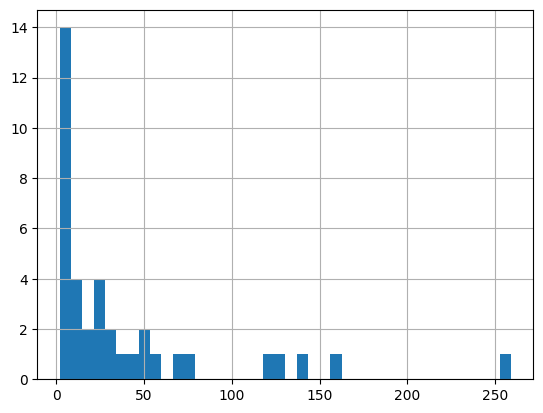

In [376]:
new_df['token_count'][new_df['characters'] == "Gerald_Scarlett"].hist(bins = 40)

<Axes: >

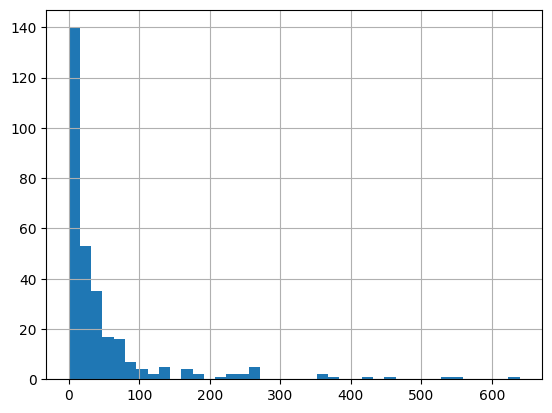

In [377]:
new_df['token_count'].hist(bins = 40)

In [378]:
new_df['token_count'].describe()

count    303.000000
mean      48.669967
std       87.345417
min        0.000000
25%        6.000000
50%       19.000000
75%       47.000000
max      639.000000
Name: token_count, dtype: float64

As there are otherwise not enough rows to perform analysis on, we split the text into chunks of 30 to perform training on.

In [379]:
def split_text(text):
    words = word_tokenize(text)
    result = []
    current_item = []
    current_length = 0

    for word in words:
        if current_length + len(word) + len(current_item) > 10:
            if len(current_item) >= 20:
                result.append(current_item)
                current_item = [word]
                current_length = len(word)
            else:
                current_item += [word]
                current_length += len(word)
        else:
            current_item.append(word)
            current_length += len(word)

    if current_item:
        result.append(current_item)

    return result


def expand_dataframe(df, col_Name):
    rows = []
    for index, row in df.iterrows():
        name = row['characters']
        name_list = row[col_Name]
        for item in name_list:
             if len(item) > 4:
              rows.append([name, " ".join(item)])

    new_df = pd.DataFrame(rows, columns=['characters', 'Chunk'])
    return new_df

In [380]:
convo_df_main['Chunks'] = convo_df_main['text_out_processed'].apply(split_text)
df_main_chunked = expand_dataframe(convo_df_main, "Chunks")

In [381]:
df_main_chunked

characters                                              Chunk
0    Melanie_Scarlett  something important tell hardly know say nearl...
1     Gerald_Scarlett                 none county touch state well missy
2     Gerald_Scarlett  reason buy ask buy well use buy go mope child ...
3     Gerald_Scarlett  twelve oak usual cade settle set gallery sever...
4     Gerald_Scarlett  miss what s her name sweet little thing last y...
..                ...                                                ...
814   Ashley_Scarlett  man love woman love year finally get war go aw...
815   Ashley_Scarlett  find care much believe would killed die love c...
816   Ashley_Scarlett  love marry know ley see fool thought could mak...
817   Ashley_Scarlett  marry protect give free rein anything would ma...
818   Ashley_Scarlett  play like child child brave frightened bullhea...

[819 rows x 2 columns]

In [382]:
df_main_chunked['characters'].value_counts()

characters
Rhett_Scarlett      372
Melanie_Scarlett    193
Ashley_Scarlett     172
Gerald_Scarlett      82
Name: count, dtype: int64

Now this data can be vectorized:

In [383]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(ngram_range = (1, 3), max_df=0.9)

In [384]:
df_main_chunked['characters'].value_counts()

characters
Rhett_Scarlett      372
Melanie_Scarlett    193
Ashley_Scarlett     172
Gerald_Scarlett      82
Name: count, dtype: int64

As there is a class imbalance, we first want to select 30 real observations from each group, and then augment the training classes through SMOTE:

In [385]:
def select_equal_groups(group: pd.core.groupby.generic.DataFrameGroupBy, n: int):
    return group.sample(min(n, len(group)), random_state=42)

df_test = df_main_chunked.groupby('characters', group_keys=False)\
          .apply(select_equal_groups, 30)

In [386]:
df_train = df_main_chunked[~df_main_chunked.index.isin(df_test.index)]

In [387]:
print(df_train['characters'].value_counts())
print(df_test['characters'].value_counts())

characters
Rhett_Scarlett      342
Melanie_Scarlett    163
Ashley_Scarlett     142
Gerald_Scarlett      52
Name: count, dtype: int64
characters
Ashley_Scarlett     30
Gerald_Scarlett     30
Melanie_Scarlett    30
Rhett_Scarlett      30
Name: count, dtype: int64


As one class is overbalanced, we want to reduce the majority class to 150 so that for Gerald the oversampling is not too much:

In [388]:
df_train = df_train.groupby('characters', group_keys=False)\
          .apply(select_equal_groups, 160)

In [389]:
X_train = vectorizer.fit_transform(df_train['Chunk'])
X_test = vectorizer.transform(df_test['Chunk'])
y_train = df_train.characters.reset_index(drop = True)
y_test = df_test.characters.reset_index(drop = True)

In [390]:
y_train.value_counts()

characters
Melanie_Scarlett    160
Rhett_Scarlett      160
Ashley_Scarlett     142
Gerald_Scarlett      52
Name: count, dtype: int64

In [391]:
y_test.value_counts()

characters
Ashley_Scarlett     30
Gerald_Scarlett     30
Melanie_Scarlett    30
Rhett_Scarlett      30
Name: count, dtype: int64

In [392]:
!pip install imbalanced-learn

In [393]:
from imblearn.over_sampling import SMOTE

def smote_upsampling(X, y):
    """
    Perform SMOTE upsampling on the input features and target labels.

    Parameters:
        X (array-like): Input features.
        y (array-like): Target labels.

    Returns:
        X_resampled (array-like): Resampled features.
        y_resampled (array-like): Resampled target labels.
    """
    # Initialize SMOTE object
    smote = SMOTE()

    # Perform SMOTE upsampling
    X_resampled, y_resampled = smote.fit_resample(X, y)

    return X_resampled, y_resampled

# Example usage:
# X_train and y_train are your training features and labels, respectively
X_train_resampled, y_train_resampled = smote_upsampling(X_train, y_train)

In [394]:
print(y_train_resampled.value_counts())

characters
Ashley_Scarlett     160
Gerald_Scarlett     160
Melanie_Scarlett    160
Rhett_Scarlett      160
Name: count, dtype: int64


##5B. TF-IDF per class statistics

In [413]:
train_df = pd.DataFrame(X_train.toarray(), columns=vectorizer.get_feature_names_out())
train_df['y'] = y_train

In [414]:
grouped_train = train_df.groupby('y').sum()

In [415]:
# Find the most popular tokens for each class
top_tokens_train = {}

for class_label, data in grouped_train.iterrows():
    top_tokens_train[class_label] = data.nlargest(20)

In [416]:
top_tokens_train

{'Ashley_Scarlett': know     2.635327
 go       2.405458
 get      2.268960
 want     2.256125
 ley      2.199788
 love     2.190770
 well     1.978155
 would    1.966918
 could    1.951711
 like     1.904530
 world    1.892808
 war      1.700299
 never    1.625033
 come     1.619369
 think    1.599477
 look     1.512130
 day      1.494573
 money    1.483496
 thing    1.474093
 tell     1.381421
 Name: Ashley_Scarlett, dtype: float64,
 'Gerald_Scarlett': marry     1.256398
 mother    0.972551
 pa        0.967023
 like      0.906258
 die       0.811588
 miss      0.793757
 go        0.788562
 know      0.745787
 puss      0.714576
 look      0.705097
 man       0.698649
 cry       0.676824
 ley       0.657994
 little    0.649892
 good      0.648766
 come      0.639188
 make      0.628587
 poor      0.612285
 say       0.605495
 want      0.574782
 Name: Gerald_Scarlett, dtype: float64,
 'Melanie_Scarlett': know       3.147863
 get        2.951644
 go         2.834709
 think      2.77330

In [417]:
from collections import Counter

# Combine all the tokens from top_tokens_train
all_tokens = []
for class_label, tokens in top_tokens_train.items():
    all_tokens.extend(tokens.index)

# Count the occurrences of each token
token_counts = Counter(all_tokens)

# Convert the Counter object to a set
token_set = set(token_counts.items())

print("Set of all tokens and their counts:")
print(token_set)

Set of all tokens and their counts:
{('go', 4), ('love', 1), ('home', 1), ('way', 1), ('ever', 1), ('tell', 2), ('one', 1), ('poor', 1), ('ley', 3), ('well', 3), ('think', 3), ('money', 2), ('say', 3), ('pa', 1), ('make', 2), ('must', 1), ('man', 1), ('know', 4), ('good', 2), ('little', 1), ('never', 2), ('day', 1), ('baby', 1), ('miss', 1), ('cry', 1), ('right', 1), ('see', 1), ('puss', 1), ('come', 4), ('die', 2), ('take', 1), ('let', 1), ('want', 4), ('yes', 1), ('could', 2), ('darling', 1), ('like', 3), ('war', 1), ('mother', 1), ('get', 3), ('would', 3), ('look', 3), ('thing', 1), ('marry', 1), ('world', 1)}


In [418]:
common_tokens = {token: count for token, count in token_set if count > 1}

In [419]:
import numpy as np

In [420]:
common_tokens

{'go': 4,
 'tell': 2,
 'ley': 3,
 'well': 3,
 'think': 3,
 'money': 2,
 'say': 3,
 'make': 2,
 'know': 4,
 'good': 2,
 'never': 2,
 'come': 4,
 'die': 2,
 'want': 4,
 'could': 2,
 'like': 3,
 'get': 3,
 'would': 3,
 'look': 3}

In [421]:
# Remove common tokens from the vectorizers
common_tokens_indices = [vectorizer.vocabulary_[token] for token in common_tokens]
#vectorizer.vocabulary_ = {token: index for token, index in vectorizer.vocabulary_.items() if index not in common_tokens_indices}

In [422]:
X_train_resampled.shape

(640, 17814)

In [423]:
len(vectorizer.vocabulary_)

17814

In [424]:
#X_train_resampled = np.delete(X_train_resampled.toarray(), common_tokens_indices, axis=1)

In [425]:
#X_test= np.delete(X_test.toarray(), common_tokens_indices, axis=1)

In [426]:
#from scipy.sparse import csr_matrix
#X_train_resampled = csr_matrix(X_train_resampled)
#X_test_resampled = csr_matrix(X_test)

In [427]:
top_tokens_train['Ashley_Scarlett']

know     2.635327
go       2.405458
get      2.268960
want     2.256125
ley      2.199788
love     2.190770
well     1.978155
would    1.966918
could    1.951711
like     1.904530
world    1.892808
war      1.700299
never    1.625033
come     1.619369
think    1.599477
look     1.512130
day      1.494573
money    1.483496
thing    1.474093
tell     1.381421
Name: Ashley_Scarlett, dtype: float64

In [428]:
top_tokens_train['Melanie_Scarlett']

know       3.147863
get        2.951644
go         2.834709
think      2.773307
come       2.598538
must       2.526617
home       2.124683
die        2.115394
ley        1.934896
well       1.921099
take       1.919187
would      1.874365
baby       1.839617
say        1.783469
darling    1.763914
let        1.694854
want       1.634912
could      1.593744
right      1.512018
look       1.402744
Name: Melanie_Scarlett, dtype: float64

In [429]:
top_tokens_train['Rhett_Scarlett']

go       2.738071
think    2.646508
money    2.503122
want     2.460214
like     2.426807
tell     2.308431
know     2.301732
well     2.223550
say      2.160655
never    2.079052
get      2.065161
good     1.687180
would    1.678273
yes      1.554636
make     1.541149
way      1.486546
one      1.484165
ever     1.458761
see      1.413984
come     1.286918
Name: Rhett_Scarlett, dtype: float64

In [430]:
top_tokens_train['Gerald_Scarlett']

marry     1.256398
mother    0.972551
pa        0.967023
like      0.906258
die       0.811588
miss      0.793757
go        0.788562
know      0.745787
puss      0.714576
look      0.705097
man       0.698649
cry       0.676824
ley       0.657994
little    0.649892
good      0.648766
come      0.639188
make      0.628587
poor      0.612285
say       0.605495
want      0.574782
Name: Gerald_Scarlett, dtype: float64

##6. Logistic Regression


We perform a GridSearch on the training data

In [441]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

#make a list of parameters:
param_grid = {
    'C': [10, 100],  # Regularization parameter
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']# Penalty term
}

# Initialize and fit logistic regression model
logreg = LogisticRegression(max_iter=1000)
gridsearch = GridSearchCV(logreg, param_grid, cv=KFold(5, shuffle=True, random_state=42), verbose=2, n_jobs=-1)

In [444]:
gridsearch.fit(X_train_resampled, y_train_resampled)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=LogisticRegression(max_iter=1000), n_jobs=-1,
             param_grid={'C': [10, 100], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             verbose=2)

Then we take the best results of the grisearch and fit it to the model:

In [445]:
cv_results_df = pd.DataFrame(gridsearch.cv_results_)

In [446]:
cv_results_df.sort_values(by='mean_test_score', ascending=False)

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
6       0.039594      0.001089         0.002260        0.000123     100   
7       1.792295      0.604834         0.002408        0.000449     100   
5      20.317904      5.213629         0.004171        0.003080     100   
2       0.080913      0.011864         0.002093        0.000145      10   
3       1.453214      0.451523         0.004741        0.004522      10   
4      17.157593     32.897581         0.006354        0.005295     100   
0      34.454381     45.780115         0.003221        0.001053      10   
1      12.924950      2.689386         0.009449        0.013158      10   

  param_penalty param_solver  \
6            l2    liblinear   
7            l2         saga   
5            l1         saga   
2            l2    liblinear   
3            l2         saga   
4            l1    liblinear   
0            l1    liblinear   
1            l1         saga   

                                              params  split0_test_score  \
6  {'C': 100, 'penalty': 'l2', 'solver': 'libline...           0.671875   
7      {'C': 100, 'penalty': 'l2', 'solver': 'saga'}           0.664062   
5      {'C': 100, 'penalty': 'l1', 'solver': 'saga'}           0.648438   
2  {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}           0.648438   
3       {'C': 10, 'penalty': 'l2', 'solver': 'saga'}           0.648438   
4  {'C': 100, 'penalty': 'l1', 'solver': 'libline...           0.656250   
0  {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}           0.625000   
1       {'C': 10, 'penalty': 'l1', 'solver': 'saga'}           0.601562   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
6           0.625000           0.648438           0.679688           0.656250   
7           0.625000           0.648438           0.671875           0.664062   
5           0.617188           0.609375           0.687500           0.671875   
2           0.625000           0.640625           0.656250           0.656250   
3           0.625000           0.648438           0.656250           0.648438   
4           0.593750           0.562500           0.601562           0.679688   
0           0.617188           0.531250           0.609375           0.671875   
1           0.570312           0.515625           0.570312           0.625000   

   mean_test_score  std_test_score  rank_test_score  
6         0.656250        0.019137                1  
7         0.654687        0.016683                2  
5         0.646875        0.030217                3  
2         0.645312        0.011693                4  
3         0.645312        0.010597                4  
4         0.618750        0.042905                6  
0         0.610938        0.045393                7  
1         0.576562        0.036777                8

In [449]:
logregfinal = LogisticRegression(max_iter = 1000, solver = "liblinear", penalty = "l2", C = 100)
logregfinal.fit(X_train_resampled, y_train_resampled)

LogisticRegression(C=100, max_iter=1000, solver='liblinear')

In [450]:
y_pred = logregfinal.predict(X_test)

In [451]:
y_pred

array(['Rhett_Scarlett', 'Ashley_Scarlett', 'Melanie_Scarlett',
       'Melanie_Scarlett', 'Ashley_Scarlett', 'Ashley_Scarlett',
       'Rhett_Scarlett', 'Ashley_Scarlett', 'Rhett_Scarlett',
       'Rhett_Scarlett', 'Ashley_Scarlett', 'Ashley_Scarlett',
       'Ashley_Scarlett', 'Ashley_Scarlett', 'Ashley_Scarlett',
       'Rhett_Scarlett', 'Ashley_Scarlett', 'Rhett_Scarlett',
       'Rhett_Scarlett', 'Melanie_Scarlett', 'Melanie_Scarlett',
       'Rhett_Scarlett', 'Rhett_Scarlett', 'Ashley_Scarlett',
       'Ashley_Scarlett', 'Ashley_Scarlett', 'Melanie_Scarlett',
       'Ashley_Scarlett', 'Rhett_Scarlett', 'Melanie_Scarlett',
       'Melanie_Scarlett', 'Rhett_Scarlett', 'Ashley_Scarlett',
       'Melanie_Scarlett', 'Ashley_Scarlett', 'Gerald_Scarlett',
       'Rhett_Scarlett', 'Rhett_Scarlett', 'Gerald_Scarlett',
       'Ashley_Scarlett', 'Gerald_Scarlett', 'Melanie_Scarlett',
       'Gerald_Scarlett', 'Ashley_Scarlett', 'Rhett_Scarlett',
       'Melanie_Scarlett', 'Rhett_Scarlett', 

In [452]:
from sklearn.metrics import classification_report

In [453]:
print(classification_report(y_test, y_pred))

                  precision    recall  f1-score   support

 Ashley_Scarlett       0.50      0.47      0.48        30
 Gerald_Scarlett       0.90      0.30      0.45        30
Melanie_Scarlett       0.50      0.70      0.58        30
  Rhett_Scarlett       0.40      0.53      0.46        30

        accuracy                           0.50       120
       macro avg       0.57      0.50      0.49       120
    weighted avg       0.57      0.50      0.49       120



In [ ]:
!pip install eli5

In [454]:
import eli5
eli5.show_weights(logregfinal, feature_names = vectorizer.get_feature_names_out())

Check the results of the performance

In [455]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, recall_score, f1_score, precision_score

default_metrics = {
    'accuracy': accuracy_score,
    'recall': lambda y_t, y_p: recall_score(y_t, y_p, zero_division="warn", average='micro'),
    'precision': lambda y_t, y_p: precision_score(y_t, y_p, zero_division="warn", average='micro'),
    'f1': lambda y_t, y_p: f1_score(y_t, y_p, zero_division= "warn", average ='macro')
}


def plot_accuracy(df, metrics):
    y_true = df['characters']
    y_pred = df['prediction']

    # Plot count confusion matrix
    cm_disp = ConfusionMatrixDisplay.from_predictions(y_true, y_pred)

    # Show plot
    plt.show()

    # Calculate metrics
    metrics = {metric_name: metric_func(y_true, y_pred) for metric_name, metric_func in metrics.items()}
    print(metrics)

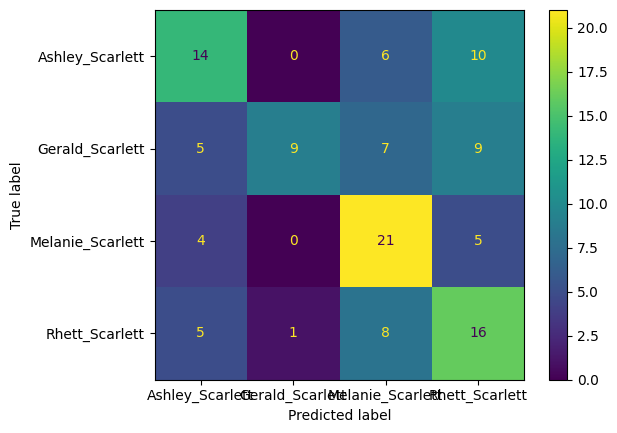

{'accuracy': 0.5, 'recall': 0.5, 'precision': 0.5, 'f1': 0.49330870279146144}


In [456]:
df_test['prediction'] = y_pred
plot_accuracy(df_test, default_metrics)

In [459]:
df_test[(df_test['characters'] == "Ashley_Scarlett") & (df_test['prediction'] == "Rhett_Scarlett")]

index       characters                                              Chunk  \
0     498  Ashley_Scarlett  fiddle partly reason partly tell truth pid rea...   
6     513  Ashley_Scarlett  talk go new york think nothing atlanta besides...   
8     555  Ashley_Scarlett  lazy little creole work hard like poor devil m...   
9     365  Ashley_Scarlett  skunk ever one become wonder wonder become tar...   
15    225  Ashley_Scarlett  tara must go dear let kiss pretty face must de...   
17    246  Ashley_Scarlett  like quality like beget like realize still che...   
18    497  Ashley_Scarlett  make good mad well aim pray good plenty reason...   
21    355  Ashley_Scarlett  mrs wilke bother husband capture first manassa...   
22    446  Ashley_Scarlett  ah difference even though poor still feel like...   
28    240  Ashley_Scarlett  might hear pray compose like well sometimes ac...   

        prediction  
0   Rhett_Scarlett  
6   Rhett_Scarlett  
8   Rhett_Scarlett  
9   Rhett_Scarlett  
15  Rhett_Scarlett  
17  Rhett_Scarlett  
18  Rhett_Scarlett  
21  Rhett_Scarlett  
22  Rhett_Scarlett  
28  Rhett_Scarlett

In [458]:
df_test = df_test.reset_index()

In [464]:
eli5.show_prediction(logregfinal, X_test[15], top =20, feature_names = vectorizer.get_feature_names_out())

In [463]:
df_test.loc[6, 'Chunk']

'talk go new york think nothing atlanta besides place say anything wife duty go husband goes need position fill go'

## 8. Sentiment Analysis Regression

In [466]:
from transformers import pipeline
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained("lxyuan/distilbert-base-multilingual-cased-sentiments-student", max_length = 512, truncation = True)

distilled_student_sentiment_classifier = pipeline(
    model="lxyuan/distilbert-base-multilingual-cased-sentiments-student",
    tokenizer = tokenizer,
    return_all_scores=True
)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/373 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.92M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/759 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/541M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/pipelines/text_classification.py:104: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


In [467]:
tokenizer_kwargs = {'truncation':True,'max_length':512}
def sentiment_analysis_score(text):
    if len(text.split(" ")) > 5:
      sentiment_results = distilled_student_sentiment_classifier(text, **tokenizer_kwargs)
      positive_score = sentiment_results[0][0]['score']
      negative_score = sentiment_results[0][2]['score']
      return positive_score - negative_score
    return

In [468]:
convo_df_main['sent_score'] = convo_df_main['text_out'].apply(sentiment_analysis_score)

In [474]:
convo_df_main.groupby(['characters']).agg({'sent_score': 'median'})

sent_score
characters                  
Ashley_Scarlett    -0.372742
Gerald_Scarlett    -0.322369
Melanie_Scarlett   -0.294469
Rhett_Scarlett     -0.356902

<Axes: >

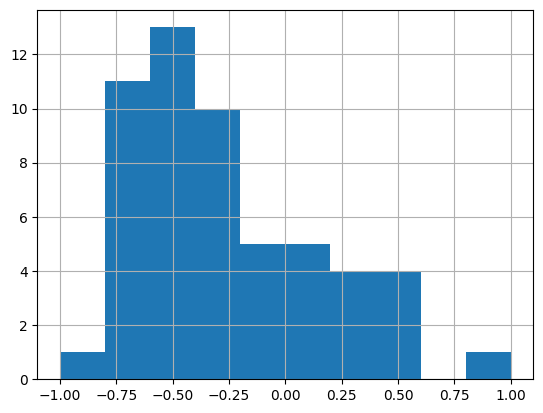

In [479]:
convo_df_main['sent_score'][convo_df_main['characters'] == "Ashley_Scarlett"].hist(range=[-1, 1])

<Axes: >

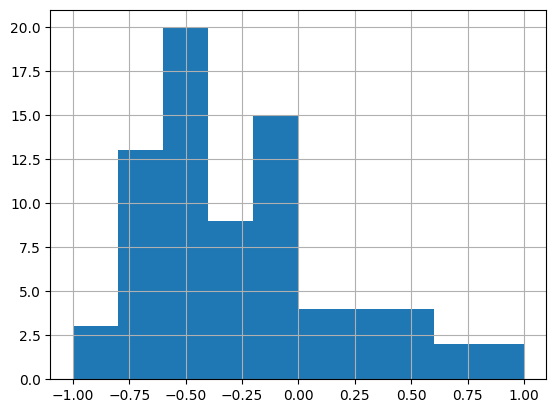

In [480]:
convo_df_main['sent_score'][convo_df_main['characters'] == "Rhett_Scarlett"].hist(range=[-1, 1])

In [481]:
convo_df_main['sent_score'][convo_df_main['characters'] == "Gerald_Scarlett"].hist(range=[-1, 1])

<Axes: >

In [482]:
convo_df_main['sent_score'][convo_df_main['characters'] == "Melanie_Scarlett"].hist(range=[-1, 1])

<Axes: >

## 9. LDA

Melanie_Scarlett

In [483]:
from gensim.corpora import Dictionary
from gensim.models import LdaModel

# Assuming you have a DataFrame named combined_df_Melanie with 'text_out_processed' column
texts = combined_df_Melanie['text_out_processed'].apply(lambda x: x.split())

all_topics = []

# Iterate through each row and apply LDA
for text in texts:
    # Create a dictionary from the preprocessed data
    dictionary = Dictionary([text])

    # Convert the preprocessed text data into bag-of-words format
    bow_corpus = [dictionary.doc2bow(text)]

    # Train the LDA model
    num_topics = 5
    ldamodel = LdaModel(bow_corpus, num_topics=num_topics, id2word=dictionary, passes=20, alpha='auto', eta='auto')

    # Get the topics
    topics = ldamodel.show_topics(num_topics=num_topics, num_words=10, log=False, formatted=False)

    # Extract top words for each topic
    text_topics = []
    for topic_id, topic in topics:
        text_topics.append([word for word, _ in topic])

    all_topics.append(text_topics)

# Print the topics for each text
for idx, topics in enumerate(all_topics):
    print(f"Text {idx + 1} Topics:")
    for topic_id, topic_words in enumerate(topics):
        print(f"Topic {topic_id + 1}: {topic_words}")


# Visualize topics using PyLDAvis
!pip install pyldavis==3.2.1
# First, install or upgrade PyLDAvis and Gensim
!pip install --upgrade pyldavis gensim

# Then, import and use PyLDAvis
import pyLDAvis.gensim
dictionary = Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]
lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=20, alpha='auto', eta='auto')

# Prepare visualization
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary)
vis

Text 1 Topics:
Topic 1: ['get', 'try', 'miss', 'thing', 'know', 'well', 'little', 'honey', 'think', 'take']
Topic 2: ['get', 'know', 'well', 'want', 'think', 'thing', 'mr', 'ever', 'miss', 'try']
Topic 3: ['get', 'know', 'try', 'home', 'think', 'thing', 'miss', 'take', 'little', 'mr']
Topic 4: ['get', 'know', 'well', 'thing', 'ever', 'try', 'honey', 'mr', 'miss', 'take']
Topic 5: ['get', 'try', 'know', 'well', 'want', 'honey', 'mr', 'take', 'little', 'home']
Text 2 Topics:
Topic 1: ['go', 'hospital', 'think', 'well', 'mrs', 'know', 'lady', 'quite', 'must', 'bring']
Topic 2: ['go', 'well', 'think', 'hospital', 'quite', 'mrs', 'reel', 'must', 'know', 'lady']
Topic 3: ['go', 'well', 'think', 'lady', 'must', 'know', 'hospital', 'like', 'see', 'minute']
Topic 4: ['well', 'think', 'go', 'know', 'must', 'hospital', 'mrs', 'reel', 'minute', 'time']
Topic 5: ['go', 'well', 'think', 'hospital', 'quite', 'know', 'reel', 'lady', 'mrs', 'must']
Text 3 Topics:
Topic 1: ['heart', 'ask', 'think', 'dea

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.089367 -0.023069       1        1  50.540437
0     -0.008534  0.115151       2        1  18.024642
4      0.107981 -0.041568       3        1  17.120582
2     -0.058758 -0.054625       4        1  14.311393
3      0.048678  0.004110       5        1   0.002945, topic_info=         Term       Freq      Total Category  logprob  loglift
44        ley  26.000000  26.000000  Default  30.0000  30.0000
162  hospital  13.000000  13.000000  Default  29.0000  29.0000
56      never  16.000000  16.000000  Default  28.0000  28.0000
354       bad  10.000000  10.000000  Default  27.0000  27.0000
353      baby  25.000000  25.000000  Default  26.0000  26.0000
..        ...        ...        ...      ...      ...      ...
56      never   0.000096  16.543746   Topic5  -6.8804  -1.6221
47       look   0.000096  19.081197   Topic5  -6.8804  -1.7648
353      baby   0.000096  25.109054   Topic5  -6.8806  -2.0395
77      thing   0.000096  14.856115   Topic5  -6.8807  -1.5148
105      back   0.000096  12.889991   Topic5  -6.8808  -1.3729

[364 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
909       4  0.760994  afternoon
345       1  0.344193         ah
345       4  0.688387         ah
269       3  0.740717      alarm
270       3  0.740727    alarmed
...     ...       ...        ...
634       4  0.760990        yas
635       4  0.760993       yell
525       1  0.618697        yes
525       2  0.123739        yes
525       4  0.247479        yes

[445 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1, 5, 3, 4])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


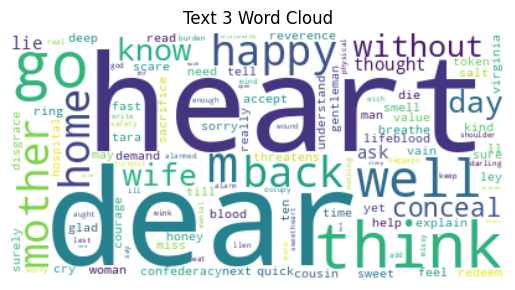

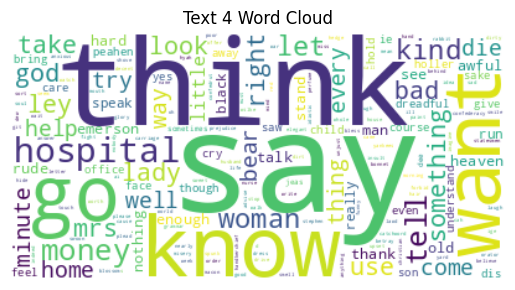

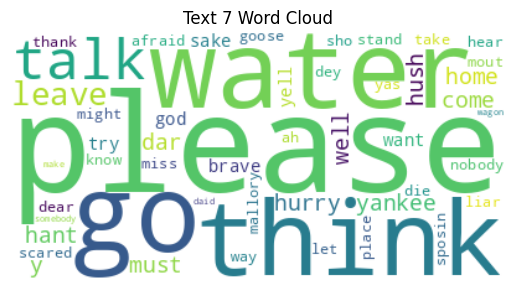

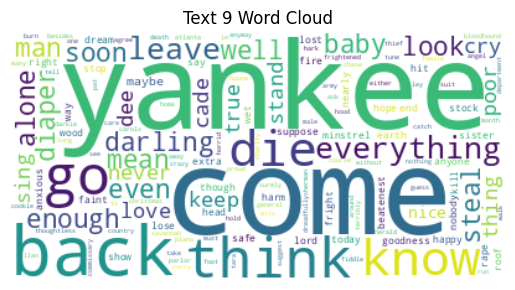

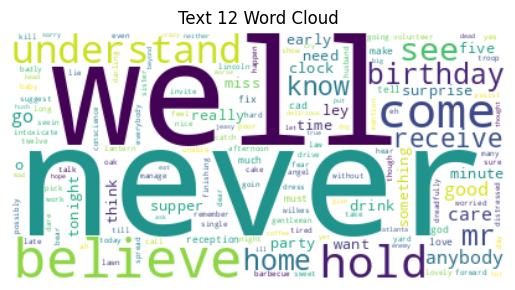

In [484]:
from gensim.corpora import Dictionary
from gensim.models import LdaModel
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named combined_df_Melanie with 'text_out_processed' column
texts = combined_df_Melanie['text_out_processed'].apply(lambda x: x.split())

# Iterate through each text and apply LDA
for idx, text in enumerate(texts):
    # Create a dictionary from the preprocessed data
    dictionary = Dictionary([text])

    # Convert the preprocessed text data into bag-of-words format
    bow_corpus = [dictionary.doc2bow(text)]

    # Train the LDA model
    num_topics = 5
    ldamodel = LdaModel(bow_corpus, num_topics=num_topics, id2word=dictionary, passes=20, alpha='auto', eta='auto')

    # Get the topics
    topics = ldamodel.show_topics(num_topics=num_topics, num_words=10, log=False, formatted=False)

    # Extract top words for each topic
    topic_words = []
    for topic_id, topic in topics:
        topic_words.extend([word for word, _ in topic])

    # Generate word cloud for the text
    wordcloud = WordCloud(background_color='white').generate(' '.join(text))
    plt.figure()
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Text {idx + 1} Word Cloud')
    plt.axis('off')
    plt.show()

Gerald_Scarlett

In [485]:
from gensim.corpora import Dictionary
from gensim.models import LdaModel

# Assuming you have a DataFrame named combined_df_Melanie with 'text_out_processed' column
texts = combined_df_Gerald['text_out_processed'].apply(lambda x: x.split())

all_topics = []

# Iterate through each row and apply LDA
for text in texts:
    # Create a dictionary from the preprocessed data
    dictionary = Dictionary([text])

    # Convert the preprocessed text data into bag-of-words format
    bow_corpus = [dictionary.doc2bow(text)]

    # Train the LDA model
    num_topics = 5
    ldamodel = LdaModel(bow_corpus, num_topics=num_topics, id2word=dictionary, passes=20, alpha='auto', eta='auto')

    # Get the topics
    topics = ldamodel.show_topics(num_topics=num_topics, num_words=10, log=False, formatted=False)

    # Extract top words for each topic
    text_topics = []
    for topic_id, topic in topics:
        text_topics.append([word for word, _ in topic])

    all_topics.append(text_topics)

# Print the topics for each text
for idx, topics in enumerate(all_topics):
    print(f"Text {idx + 1} Topics:")
    for topic_id, topic_words in enumerate(topics):
        print(f"Topic {topic_id + 1}: {topic_words}")

# Visualize topics using PyLDAvis
!pip install pyldavis==3.2.1
# First, install or upgrade PyLDAvis and Gensim
!pip install --upgrade pyldavis gensim

# Then, import and use PyLDAvis
import pyLDAvis.gensim
dictionary = Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]
lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=20, alpha='auto', eta='auto')

# Prepare visualization
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary)
vis

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Text 1 Topics:
Topic 1: ['marry', 'like', 'daughter', 'go', 'would', 'come', 'ley', 'say', 'man', 'pa']
Topic 2: ['marry', 'ley', 'would', 'say', 'like', 'go', 'wilke', 'want', 'daughter', 'man']
Topic 3: ['marry', 'like', 'would', 'ley', 'say', 'well', 'come', 'go', 'daughter', 'want']
Topic 4: ['would', 'marry', 'like', 'come', 'daughter', 'ley', 'say', 'want', 'well', 'know']
Topic 5: ['like', 'marry', 'ley', 'would', 'well', 'go', 'come', 'daughter', 'say', 'wilke']
Text 2 Topics:
Topic 1: ['know', 'cry', 'look', 'make', 'go', 'take', 'man', 'young', 'like', 'say']
Topic 2: ['know', 'cry', 'look', 'right', 'go', 'make', 'like', 'man', 'mr', 'say']
Topic 3: ['know', 'look', 'man', 'young', 'like', 'go', 'say', 'cry', 'right', 'lament']
Topic 4: ['know', 'go', 'man', 'look', 'take', 'right', 'cry', 'say', 'make', 'war']
Topic 5: ['know', 'man', 'go', 'cry', 'look', 'say', 'like', 'take', 'young', 'right']
Text 3 Topics:
Topic 1: ['mother', 'home', 'well', 'would', 'house', 'girl', 's

  Using cached pyLDAvis-3.4.1-py3-none-any.whl (2.6 MB)
  Attempting uninstall: pyldavis
    Found existing installation: pyLDAvis 3.2.1
    Uninstalling pyLDAvis-3.2.1:
      Successfully uninstalled pyLDAvis-3.2.1


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.070393 -0.061381       1        1  61.142426
0      0.120285 -0.024102       2        1  38.849336
4     -0.016637  0.028524       3        1   0.003350
2     -0.016635  0.028524       4        1   0.002979
1     -0.016621  0.028436       5        1   0.001909, topic_info=       Term       Freq      Total Category  logprob  loglift
350    home   9.000000   9.000000  Default  30.0000  30.0000
456     die   8.000000   8.000000  Default  29.0000  29.0000
156   marry  12.000000  12.000000  Default  28.0000  28.0000
167  mother  22.000000  22.000000  Default  27.0000  27.0000
500   money   7.000000   7.000000  Default  26.0000  26.0000
..      ...        ...        ...      ...      ...      ...
221       s   0.000045   7.005098   Topic5  -6.4524  -1.0993
186     old   0.000045   8.056028   Topic5  -6.4524  -1.2390
139     let   0.000045   8.874795   Topic5  -6.4525  -1.3359
100     god   0.000045   8.056033   Topic5  -6.4526  -1.2392
302  yankee   0.000045   7.179265   Topic5  -6.4526  -1.1240

[342 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
1         2  0.863556  afternoon
4         2  0.863536      alike
7         1  0.222672     always
7         2  0.668017     always
9         2  0.863523     amount
...     ...       ...        ...
300       2  0.580244      would
301       2  1.011745          x
302       1  0.696450     yankee
302       2  0.417870     yankee
558       1  1.010247    yankees

[236 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 1, 5, 3, 2])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


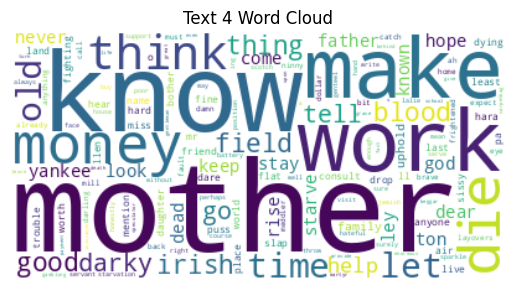

In [486]:
from gensim.corpora import Dictionary
from gensim.models import LdaModel
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named combined_df_Melanie with 'text_out_processed' column
texts = combined_df_Gerald['text_out_processed'].apply(lambda x: x.split())

# Iterate through each text and apply LDA
for idx, text in enumerate(texts):
    # Create a dictionary from the preprocessed data
    dictionary = Dictionary([text])

    # Convert the preprocessed text data into bag-of-words format
    bow_corpus = [dictionary.doc2bow(text)]

    # Train the LDA model
    num_topics = 5
    ldamodel = LdaModel(bow_corpus, num_topics=num_topics, id2word=dictionary, passes=20, alpha='auto', eta='auto')

    # Get the topics
    topics = ldamodel.show_topics(num_topics=num_topics, num_words=10, log=False, formatted=False)

    # Extract top words for each topic
    topic_words = []
    for topic_id, topic in topics:
        topic_words.extend([word for word, _ in topic])

    # Generate word cloud for the text
    wordcloud = WordCloud(background_color='white').generate(' '.join(text))
    plt.figure()
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Text {idx + 1} Word Cloud')
    plt.axis('off')
    plt.show()

Ashley_Scarlett

In [487]:
from gensim.corpora import Dictionary
from gensim.models import LdaModel

# Assuming you have a DataFrame named combined_df_Melanie with 'text_out_processed' column
texts = combined_df_Ashley['text_out_processed'].apply(lambda x: x.split())

all_topics = []

# Iterate through each row and apply LDA
for text in texts:
    # Create a dictionary from the preprocessed data
    dictionary = Dictionary([text])

    # Convert the preprocessed text data into bag-of-words format
    bow_corpus = [dictionary.doc2bow(text)]

    # Train the LDA model
    num_topics = 5
    ldamodel = LdaModel(bow_corpus, num_topics=num_topics, id2word=dictionary, passes=20, alpha='auto', eta='auto')

    # Get the topics
    topics = ldamodel.show_topics(num_topics=num_topics, num_words=10, log=False, formatted=False)

    # Extract top words for each topic
    text_topics = []
    for topic_id, topic in topics:
        text_topics.append([word for word, _ in topic])

    all_topics.append(text_topics)

# Print the topics for each text
for idx, topics in enumerate(all_topics):
    print(f"Text {idx + 1} Topics:")
    for topic_id, topic_words in enumerate(topics):
        print(f"Topic {topic_id + 1}: {topic_words}")

# Visualize topics using PyLDAvis
!pip install pyldavis==3.2.1
# First, install or upgrade PyLDAvis and Gensim
!pip install --upgrade pyldavis gensim

# Then, import and use PyLDAvis
import pyLDAvis.gensim
dictionary = Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]
lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=20, alpha='auto', eta='auto')

# Prepare visualization
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary)
vis

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Text 1 Topics:
Topic 1: ['think', 'love', 'know', 'let', 'well', 'till', 'marry', 'war', 'probably', 'look']
Topic 2: ['love', 'know', 'think', 'let', 'war', 'day', 'till', 'could', 'look', 'well']
Topic 3: ['think', 'love', 'know', 'war', 'let', 'look', 'could', 'well', 'day', 'till']
Topic 4: ['know', 'think', 'love', 'till', 'war', 'let', 'probably', 'marry', 'well', 'day']
Topic 5: ['love', 'think', 'know', 'let', 'till', 'war', 'well', 'marry', 'look', 'day']
Text 2 Topics:
Topic 1: ['like', 'know', 'go', 'love', 'life', 'first', 'come', 'well', 'would', 'war']
Topic 2: ['like', 'go', 'know', 'life', 'love', 'come', 'war', 'could', 'dear', 'man']
Topic 3: ['like', 'go', 'know', 'life', 'bad', 'war', 'first', 'would', 'well', 'could']
Topic 4: ['like', 'go', 'life', 'know', 'love', 'first', 'war', 'would', 'come', 'well']
Topic 5: ['go', 'like', 'love', 'life', 'would', 'know', 'come', 'first', 'war', 'man']
Text 3 Topics:
Topic 1: ['know', 'get', 'say', 'well', 'ley', 'go', 'way',

  Using cached pyLDAvis-3.4.1-py3-none-any.whl (2.6 MB)
  Attempting uninstall: pyldavis
    Found existing installation: pyLDAvis 3.2.1
    Uninstalling pyLDAvis-3.2.1:
      Successfully uninstalled pyLDAvis-3.2.1


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.086761 -0.031177       1        1  48.444365
2     -0.077384  0.080286       2        1  32.085038
0      0.073729  0.059655       3        1  19.467727
1     -0.041580 -0.054419       4        1   0.001798
4     -0.041527 -0.054345       5        1   0.001072, topic_info=      Term       Freq      Total Category  logprob  loglift
791   give  12.000000  12.000000  Default  30.0000  30.0000
307   life  13.000000  13.000000  Default  29.0000  29.0000
410  right  10.000000  10.000000  Default  28.0000  28.0000
64     say  19.000000  19.000000  Default  27.0000  27.0000
33     get  34.000000  34.000000  Default  26.0000  26.0000
..     ...        ...        ...      ...      ...      ...
472   tell   0.000031  17.020730   Topic5  -7.0044  -1.7825
319   make   0.000031  13.750318   Topic5  -7.0045  -1.5691
64     say   0.000031  19.087657   Topic5  -7.0045  -1.8972
73    time   0.000031  14.379774   Topic5  -7.0046  -1.6140
109    bad   0.000031  12.068373   Topic5  -7.0047  -1.4389

[349 rows x 6 columns], token_table=      Topic      Freq            Term
term                                 
89        2  0.940203  accomplishment
519       3  0.819023            ache
91        2  0.940187          action
96        1  0.373571          afraid
96        2  0.622618          afraid
...     ...       ...             ...
703       3  0.154739           wrong
87        1  0.426324             yes
87        2  0.319743             yes
87        3  0.319743             yes
707       3  0.819027           young

[329 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 3, 1, 2, 5])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


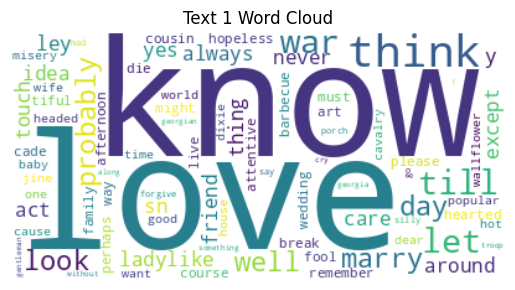

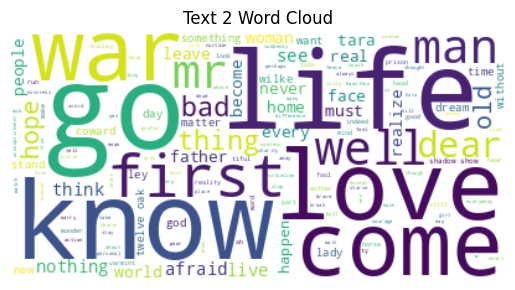

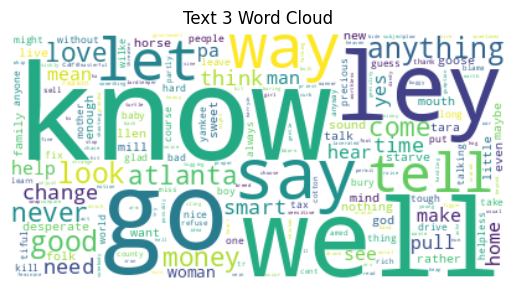

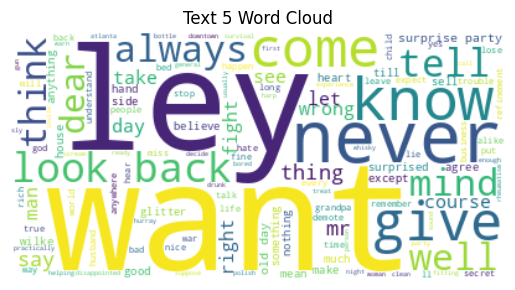

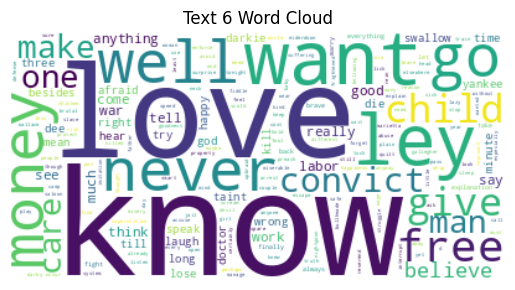

In [488]:
from gensim.corpora import Dictionary
from gensim.models import LdaModel
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named combined_df_Melanie with 'text_out_processed' column
texts = combined_df_Ashley['text_out_processed'].apply(lambda x: x.split())

# Iterate through each text and apply LDA
for idx, text in enumerate(texts):
    # Create a dictionary from the preprocessed data
    dictionary = Dictionary([text])

    # Convert the preprocessed text data into bag-of-words format
    bow_corpus = [dictionary.doc2bow(text)]

    # Train the LDA model
    num_topics = 5
    ldamodel = LdaModel(bow_corpus, num_topics=num_topics, id2word=dictionary, passes=20, alpha='auto', eta='auto')

    # Get the topics
    topics = ldamodel.show_topics(num_topics=num_topics, num_words=10, log=False, formatted=False)

    # Extract top words for each topic
    topic_words = []
    for topic_id, topic in topics:
        topic_words.extend([word for word, _ in topic])

    # Generate word cloud for the text
    wordcloud = WordCloud(background_color='white').generate(' '.join(text))
    plt.figure()
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Text {idx + 1} Word Cloud')
    plt.axis('off')
    plt.show()

Rhett_Scarlett

In [489]:
from gensim.corpora import Dictionary
from gensim.models import LdaModel

# Assuming you have a DataFrame named combined_df_Melanie with 'text_out_processed' column
texts = combined_df_Rhett['text_out_processed'].apply(lambda x: x.split())

all_topics = []

# Iterate through each row and apply LDA
for text in texts:
    # Create a dictionary from the preprocessed data
    dictionary = Dictionary([text])

    # Convert the preprocessed text data into bag-of-words format
    bow_corpus = [dictionary.doc2bow(text)]

    # Train the LDA model
    num_topics = 5
    ldamodel = LdaModel(bow_corpus, num_topics=num_topics, id2word=dictionary, passes=20, alpha='auto', eta='auto')

    # Get the topics
    topics = ldamodel.show_topics(num_topics=num_topics, num_words=10, log=False, formatted=False)

    # Extract top words for each topic
    text_topics = []
    for topic_id, topic in topics:
        text_topics.append([word for word, _ in topic])

    all_topics.append(text_topics)

# Print the topics for each text
for idx, topics in enumerate(all_topics):
    print(f"Text {idx + 1} Topics:")
    for topic_id, topic_words in enumerate(topics):
        print(f"Topic {topic_id + 1}: {topic_words}")

# Visualize topics using PyLDAvis
!pip install pyldavis==3.2.1
# First, install or upgrade PyLDAvis and Gensim
!pip install --upgrade pyldavis gensim

# Then, import and use PyLDAvis
import pyLDAvis.gensim
dictionary = Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]
lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=20, alpha='auto', eta='auto')

# Prepare visualization
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary)
vis

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Text 1 Topics:
Topic 1: ['never', 'think', 'long', 'like', 'get', 'money', 'tell', 'one', 'thing', 'bonnet']
Topic 2: ['get', 'money', 'think', 'well', 'one', 'war', 'never', 'like', 'tell', 'must']
Topic 3: ['get', 'like', 'never', 'would', 'money', 'think', 'bonnet', 'give', 'war', 'england']
Topic 4: ['think', 'money', 'get', 'thing', 'like', 'never', 'bonnet', 'one', 'long', 'well']
Topic 5: ['get', 'think', 'money', 'never', 'one', 'like', 'well', 'thing', 'war', 'bonnet']
Text 2 Topics:
Topic 1: ['go', 'home', 'get', 'yankee', 'would', 'road', 'take', 'let', 'see', 'like']
Topic 2: ['go', 'yankee', 'get', 'home', 'would', 'man', 'good', 'think', 'road', 'see']
Topic 3: ['go', 'get', 'yankee', 'home', 'road', 'would', 'good', 'well', 'think', 'come']
Topic 4: ['go', 'yankee', 'home', 'get', 'would', 'think', 'man', 'good', 'come', 'let']
Topic 5: ['go', 'yankee', 'home', 'get', 'would', 'man', 'think', 'like', 'let', 'even']
Text 3 Topics:
Topic 1: ['go', 'get', 'money', 'want', '

  Using cached pyLDAvis-3.4.1-py3-none-any.whl (2.6 MB)
  Attempting uninstall: pyldavis
    Found existing installation: pyLDAvis 3.2.1
    Uninstalling pyLDAvis-3.2.1:
      Successfully uninstalled pyLDAvis-3.2.1


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.062575 -0.069080       1        1  73.664762
2     -0.092006  0.071124       2        1  21.646324
4      0.007723 -0.036056       3        1   4.687629
3      0.071982  0.016266       4        1   0.000913
0      0.074876  0.017746       5        1   0.000372, topic_info=       Term        Freq       Total Category  logprob  loglift
242    know   83.000000   83.000000  Default  30.0000  30.0000
388     say   47.000000   47.000000  Default  29.0000  29.0000
192      go  104.000000  104.000000  Default  28.0000  28.0000
445    tell   47.000000   47.000000  Default  27.0000  27.0000
479    want   69.000000   69.000000  Default  26.0000  26.0000
..      ...         ...         ...      ...      ...      ...
455    time    0.000014   23.089836   Topic5  -7.5212  -1.8164
269     man    0.000014   36.544606   Topic5  -7.5213  -2.2757
238    keep    0.000014   20.297861   Topic5  -7.5214  -1.6877
276  matter    0.000014   16.422555   Topic5  -7.5217  -1.4761
191    give    0.000014   27.339239   Topic5  -7.5223  -1.9865

[385 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
22        1  0.715525  anything
22        2  0.214658  anything
22        3  0.071553  anything
524       1  0.963329      army
527       1  1.012610   atlanta
...     ...       ...       ...
508       2  0.478253      year
508       3  0.068322      year
1215      1  0.732345       yee
509       1  0.869551       yes
509       2  0.119938       yes

[343 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 3, 5, 4, 1])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


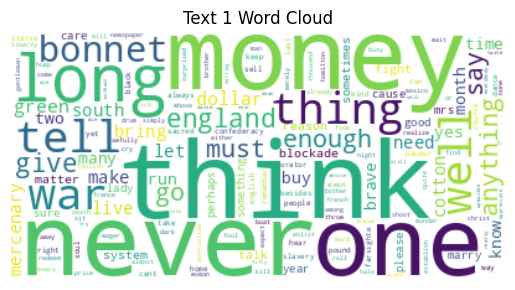

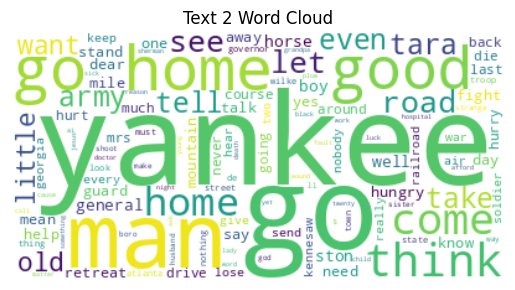

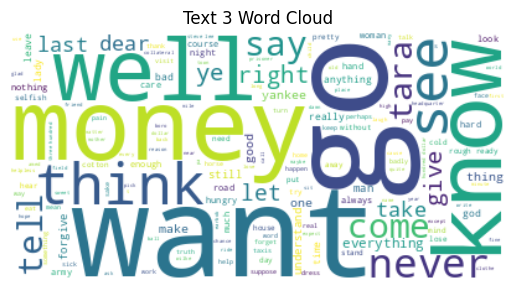

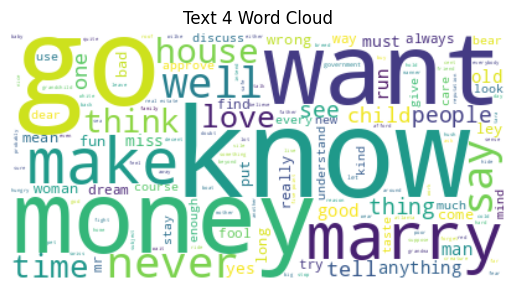

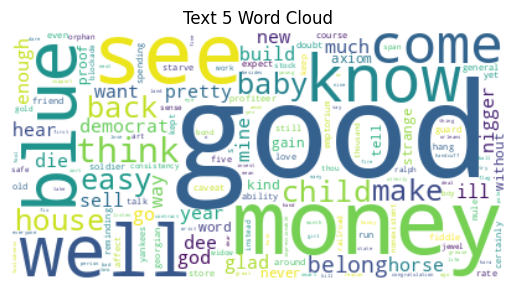

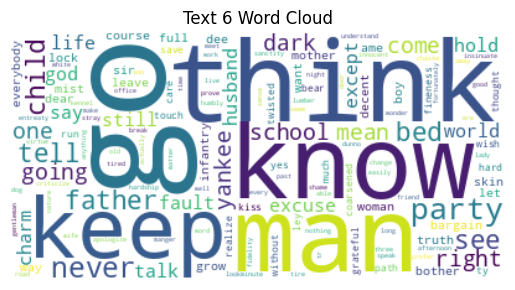

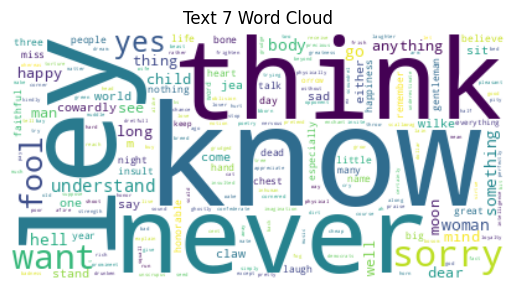

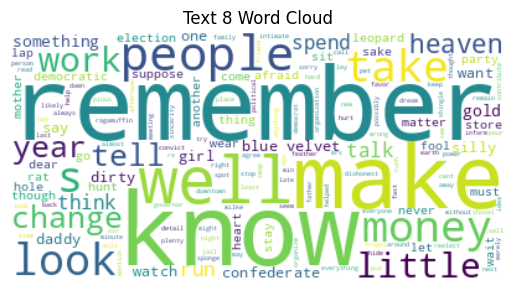

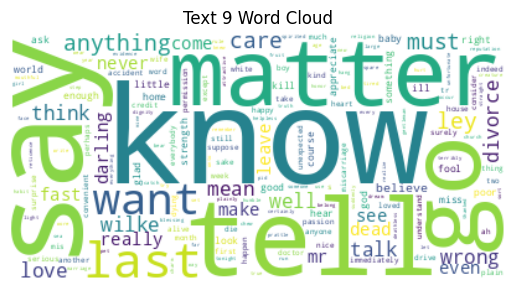

In [490]:
from gensim.corpora import Dictionary
from gensim.models import LdaModel
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named combined_df_Melanie with 'text_out_processed' column
texts = combined_df_Rhett['text_out_processed'].apply(lambda x: x.split())

# Iterate through each text and apply LDA
for idx, text in enumerate(texts):
    # Create a dictionary from the preprocessed data
    dictionary = Dictionary([text])

    # Convert the preprocessed text data into bag-of-words format
    bow_corpus = [dictionary.doc2bow(text)]

    # Train the LDA model
    num_topics = 5
    ldamodel = LdaModel(bow_corpus, num_topics=num_topics, id2word=dictionary, passes=20, alpha='auto', eta='auto')

    # Get the topics
    topics = ldamodel.show_topics(num_topics=num_topics, num_words=10, log=False, formatted=False)

    # Extract top words for each topic
    topic_words = []
    for topic_id, topic in topics:
        topic_words.extend([word for word, _ in topic])

    # Generate word cloud for the text
    wordcloud = WordCloud(background_color='white').generate(' '.join(text))
    plt.figure()
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Text {idx + 1} Word Cloud')
    plt.axis('off')
    plt.show()